In [5]:
import numpy as np
np.random.seed(0)
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
a = (names == 'Bob') # names 와 같은 모양의 Boolean array (True 혹은 False로 구성).
print(data)
print(a)
print(data[a])
data[names=='Bob'] #같은결과

data[names == 'Bob', 1:]

data[names!='Bob'] # ‘Bob’이 아닌 모든 행 선택

mask = (names == 'Bob') | (names == 'Will')
data[mask]

[[ 1.76405235  0.40015721  0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788  0.95008842 -0.15135721]
 [-0.10321885  0.4105985   0.14404357  1.45427351]
 [ 0.76103773  0.12167502  0.44386323  0.33367433]
 [ 1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567  0.04575852 -0.18718385]]
[ True False False  True False False False]
[[1.76405235 0.40015721 0.97873798 2.2408932 ]
 [0.76103773 0.12167502 0.44386323 0.33367433]]


array([[ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567,  0.04575852, -0.18718385]])

만일 ‘Bob’이 아닌 모든 행을 선택하고 싶다면

In [6]:
data[names!='Bob'] # ‘Bob’이 아닌 모든 행 선택

array([[ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567,  0.04575852, -0.18718385]])

다수의 Boolean 연산을 적용하고 싶다면 & (and) , | (or), ~ (not) 등을 적용하면 된다.

In [7]:
mask = (names == 'Bob') | (names == 'Will')
data[mask]

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574]])

numpy 원소 삽입

In [8]:
a = np.array([10,20,30,40])
# 50을 [1]번째 [3]번째 원소 앞에 삽입.
np.insert(a,[1,3],50) 

array([10, 50, 20, 30, 50, 40])

In [9]:
#50과 60을 각각 [1]번째 [3]번째 원소 앞에 삽입.
np.insert(a,[1,3],[50,60])

array([10, 50, 20, 30, 60, 40])

In [10]:
A = np.array([[10,20,30],[40,50,60],[70,80,90]])
# [1]행과 [2]행 앞에 [100,100,100]을 삽입
np.insert(A, [1,2], 100, axis=0)

array([[ 10,  20,  30],
       [100, 100, 100],
       [ 40,  50,  60],
       [100, 100, 100],
       [ 70,  80,  90]])

In [16]:
np.insert(A, [0,1], [100,200], axis =1)

array([[100,  10, 200,  20,  30],
       [100,  40, 200,  50,  60],
       [100,  70, 200,  80,  90]])

행렬 곱셈

In [19]:
x = np.array([[1., 2., 3.], [4., 5., 6.]], dtype =int)
y = np.array([[7,8], [9,10], [11,12]], dtype =int)

print(np.dot(x,y))
print(x.dot(y))
print(np.matmul(x,y))
print(x@y)

[[ 58  64]
 [139 154]]
[[ 58  64]
 [139 154]]
[[ 58  64]
 [139 154]]
[[ 58  64]
 [139 154]]


In [31]:
np.random.seed(0)
X = np.random.randn(5,5)
mat = X.T.dot(X)
mat_inv = np.linalg.inv(mat)

z = mat_inv@mat

np.trace(z)

np.linalg.det(z)

1.0000000000000018

In [ ]:
# 수업에서 진행한 HW 2-2

[-4  6 -8 ...  4 -4 12]
-0.1528
100.28145216000001


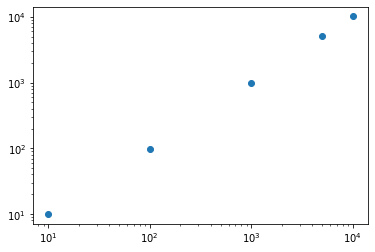

In [62]:
#1
np.random.seed(0)

arr = np.random.randint(0,2,100)

#2
left = (arr == 0)
arr[left] =-1
# 혹은
draws = np.random.randint(0,2,100)
steps = np.where(draws>0,1,-1)
#3
dist = np.cumsum(arr)

#4
arr2 = np.random.randint(0,2,1000000).reshape(100,10000)
left = (arr2 == 0)
arr2[left]=-1
result = arr2.cumsum(axis =0) # 시간에 대한 총 변위
displacement = result[99]
print(displacement)
print(np.mean(displacement))
print(np.var(displacement))

#5

nparticles = 10000
T = [10,100,1000,5000,10000]
x_fin = np.array([])
x_var = np.array([])
for i in T:
    arr = np.random.randint(0,2, size = (i, nparticles))
    arr[arr == 0]=-1
    result = arr.cumsum(axis =0)[-1]
    x_fin = np.append(x_fin, result.mean())
    x_var = np.append(x_var, result.var())

import matplotlib.pyplot as plt

plt.scatter(T, x_var)
plt.loglog(baseT =10, basex_var = 10)
plt.show()


더해주는 기작

In [53]:
a = np.array([[1,2,3],[1,3,2], [3,2,1]]).cumsum(axis=0)
a

array([[1, 2, 3],
       [2, 5, 5],
       [5, 7, 6]], dtype=int32)

Pandas

In [63]:
import pandas as pd

In [67]:
s = pd.Series([9904312, 3448737, 2890451, 2466052], index=["서울", "부산", "인천", "대구"])
s/1000000
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [69]:
y = s/1000000
y

서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
dtype: float64

In [71]:
s[(2500000<s)&(s<5000000)]

부산    3448737
인천    2890451
dtype: int64

In [72]:
s[1:3] #숫자는 숫자의 마지막을 뺌

부산    3448737
인천    2890451
dtype: int64

In [73]:
s["부산":"대구"] #문자는 마지막도 들어감

부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [78]:
# HW 2-3

s2 = pd.Series([9000000, 3000000, 2500000, 2000000],index=["서울", "부산", "인천", "대구"])

In [79]:
data = {
"2015": [9904312, 3448737, 2890451, 2466052],
"2010": [9631482, 3393191, 2632035, 2431774],
"2005": [9762546, 3512547, 2517680, 2456016],
"2000": [9853972, 3655437, 2466338, 2473990],
"지역": ["수도권", "경상권", "수도권", "경상권"],
"2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2000", "2005", "2010", "2015", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
df

,지역,2000,2005,2010,2015,2010-2015 증가율
서울,수도권,9853972,9762546,9631482,9904312,0.0283
부산,경상권,3655437,3512547,3393191,3448737,0.0163
인천,수도권,2466338,2517680,2632035,2890451,0.0982
대구,경상권,2473990,2456016,2431774,2466052,0.0141


In [80]:
df["2005-2010 증가율"] = ((df["2010"] - df["2005"]) / df["2005"] * 100).round(2)
df

,지역,2000,2005,2010,2015,2010-2015 증가율,2005-2010 증가율
서울,수도권,9853972,9762546,9631482,9904312,0.0283,-1.34
부산,경상권,3655437,3512547,3393191,3448737,0.0163,-3.40
인천,수도권,2466338,2517680,2632035,2890451,0.0982,4.54
대구,경상권,2473990,2456016,2431774,2466052,0.0141,-0.99


In [82]:
df = pd.DataFrame(np.arange(10, 22).reshape(3, 4), index=["a", "b", "c"], columns=["A", "B", "C", "D"])
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


In [83]:
df.loc['b']

A    14
B    15
C    16
D    17
Name: b, dtype: int32

In [85]:
df.iloc[0:2]

,A,B,C,D
a,10,11,12,13
b,14,15,16,17


In [86]:
df.loc[df.A>15]

,A,B,C,D
c,18,19,20,21


In [87]:
s = pd.Series(range(10))
s[3] = np.nan
s.count()

9

In [110]:
#HW 2-4 수업에서 진행

import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head()

#1
print(titanic.count(), '\n')
print('\n')
avg_age = titanic['age'].mean()
avg_age
#3
male_bool = (titanic['sex']=='male')
female_bool = (titanic['sex']=='female')

No_male = male_bool.sum()
print(No_male)
male_avg_age = titanic[male_bool]['age'].mean()
print(male_avg_age)

female_1st = (titanic['class']=='First')& (titanic['sex']=='female')
female_1st_avg = titanic[female_1st]['age'].mean()
print(female_1st_avg)

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64 



577
30.72664459161148
34.61176470588235


In [ ]:
#HW 2-5 과제아님

X1 = titanic['age'] >= 20
X2 = titanic['age'] < 20
X3 = ~(X1 | X2)
#titanic.loc()
 

titanic['category2'] = titanic.apply(lamda x: x.sex if x.age >= 20 else('child' if x.age<20 else""))